# 02 SSVEP Offline Processing

Welcome to this tutorial on processing Steady-State Visual Evoked 
Potentials (SSVEP)! As an example we will look at an 

Note: If you have not already, you will have to install the ipykernel package to
run this notebook. You can do this from your terminal with "pip install ipykernel"

Another Note: To view interactive plots you need to install ipyml with 
"pip install ipympl"

## Loading a session of SSVEP Data

First, lets load in our SSVEP example data from the appropriate XDF. Just like the previous tutorial, we will check the number of channels, channel labels, and sampling rate. 

In [36]:
# Import the bci_data module to load and process the data
from bci_essentials.bci_data import EEG_data

# Get the path of the file we want to open
filename = "examples\\data\\ssvep_example.xdf"

# Initialize data object
ssvep_data = EEG_data()

# Load the XDF file into an EEG_data object
ssvep_data.load_offline_eeg_data(filename  = filename, print_output=False)

# Check that it worked by printing the channel labels and sampling rate
print("There are ", ssvep_data.nchannels, " channels in the data")
print("The channel labels are:", ssvep_data.channel_labels)
print("The sampling rate is:", ssvep_data.fsample)

There are  16  channels in the data
The channel labels are: ['PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Cp4', 'C4', 'F4', 'Cp3', 'C3', 'F3', 'Cz', 'Fz']
The sampling rate is: 256.0


## Inspect the whole EEG

First, let's take a look at the EEG to see if anything stands out.



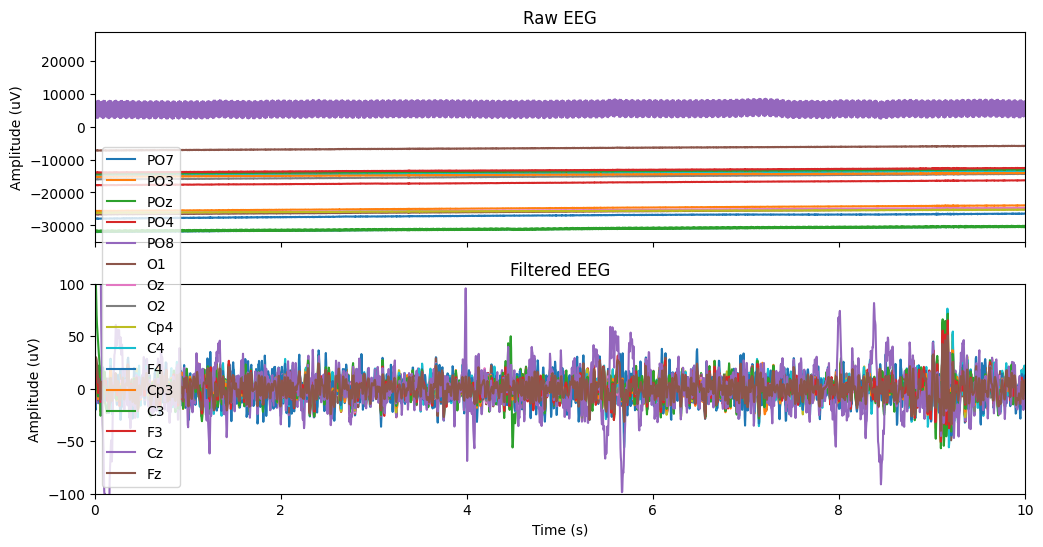

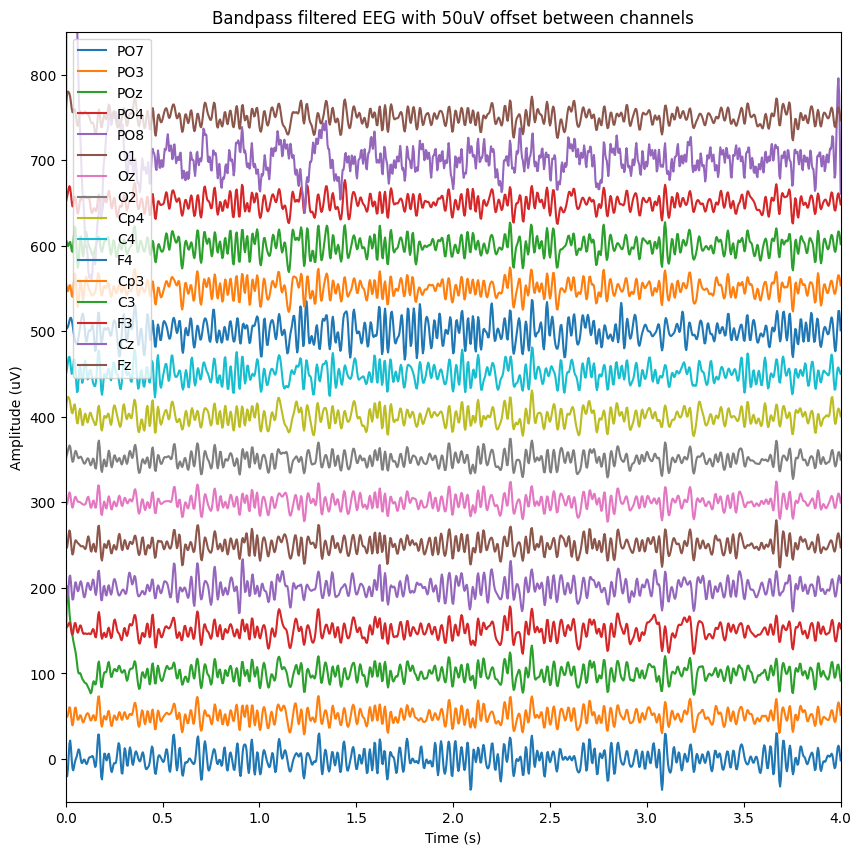

In [37]:
from bci_essentials.signal_processing import bandpass
from matplotlib import pyplot as plt
import numpy as np

raw_eeg = ssvep_data.eeg_data
timestamps = ssvep_data.eeg_timestamps - ssvep_data.eeg_timestamps[0]

# Bandpass filter between 1 and 40 Hz
bp_filt_eeg = bandpass(raw_eeg.T, 4, 40, 5, ssvep_data.fsample).T

# Plot the raw and filtered EEG
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax[0].plot(timestamps, raw_eeg)
ax[0].set_title('Raw EEG')
ax[0].set_ylabel('Amplitude (uV)')
ax[0].set_xlim([0, 10])
ax[1].plot(timestamps, bp_filt_eeg)
ax[1].set_title('Filtered EEG')
ax[1].set_ylabel('Amplitude (uV)')
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim([0, 10])
ax[1].set_ylim([-100, 100])
ax[1].legend(ssvep_data.channel_labels)
plt.show()

# Plot the bandpass_filt_eeg again but with 50uV of offset between each channel
plt.figure(figsize=(10, 10))
plt.plot(timestamps, bp_filt_eeg + np.arange(0, 50 * 16, 50))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.title('Bandpass filtered EEG with 50uV offset between channels')
plt.xlim([0, 4])
plt.ylim([-50, 850])
plt.legend(ssvep_data.channel_labels)
plt.show()




Well that looks pretty good, except for Cz, so we will have to remember that going forward.
Next up, lets look at the frequency properties of the signal. Let's start by plotting the 
power spectral density (PSD) of O1 and O2, where we expect to see the majority of the SSVEP
signal.

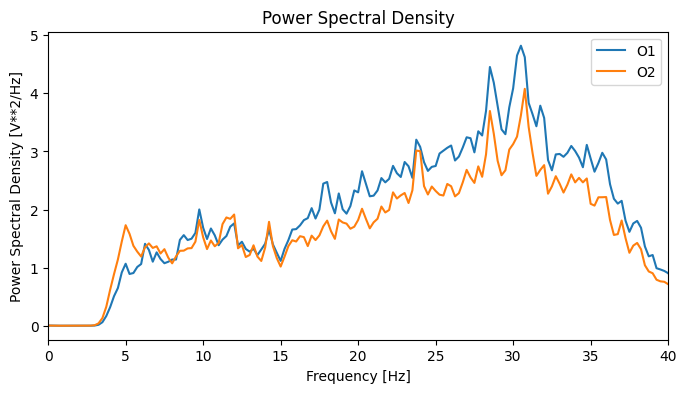

In [38]:
from scipy.signal import welch

O1_eeg = bp_filt_eeg[:, ssvep_data.channel_labels.index('O1')]
O2_eeg = bp_filt_eeg[:, ssvep_data.channel_labels.index('O2')]

# Compute the PSD of O1 and O2
freqs, O1_eeg_psd = welch(O1_eeg, ssvep_data.fsample, nperseg=2048)
freqs, O2_eeg_psd = welch(O2_eeg, ssvep_data.fsample, nperseg=2048)

freqs, O1_eeg_psd = welch(O1_eeg, ssvep_data.fsample, nperseg=1024)
freqs, O2_eeg_psd = welch(O2_eeg, ssvep_data.fsample, nperseg=1024)



# Plot the PSD of the filtered EEG data
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(freqs, np.abs(O1_eeg_psd), label='O1')
ax.plot(freqs, np.abs(O2_eeg_psd), label='O2')
ax.set_xlim([0, 40])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power Spectral Density [V**2/Hz]')
ax.set_title('Power Spectral Density')
ax.legend()

plt.show()

Cool! It looks like we have some peaks in the PSD of the signal, hopefully they
correspond to our SSVEP stimulation frequencies.



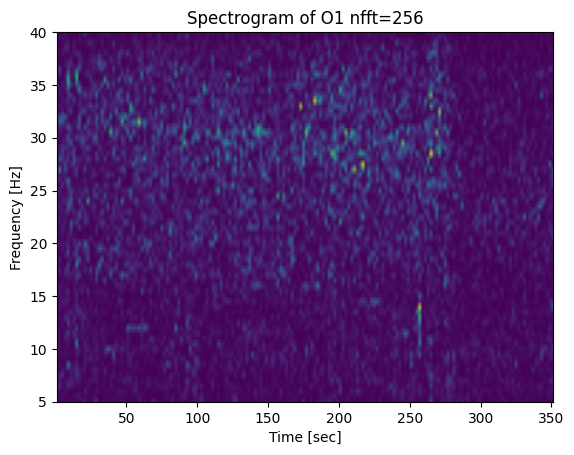

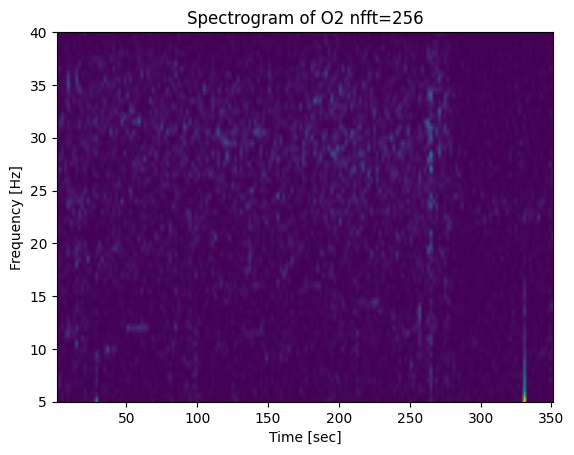

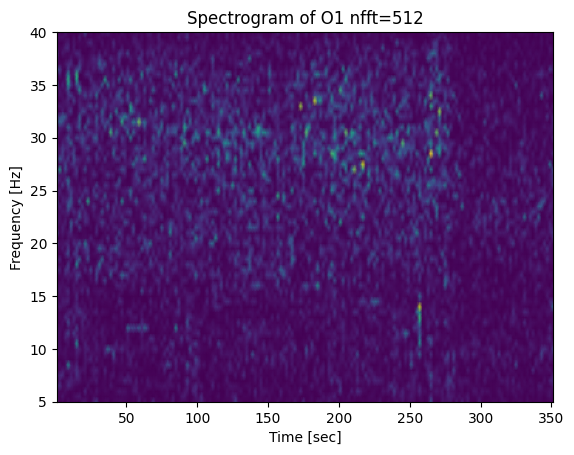

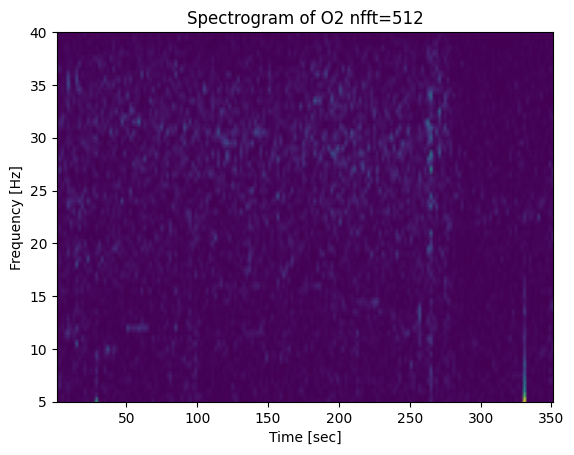

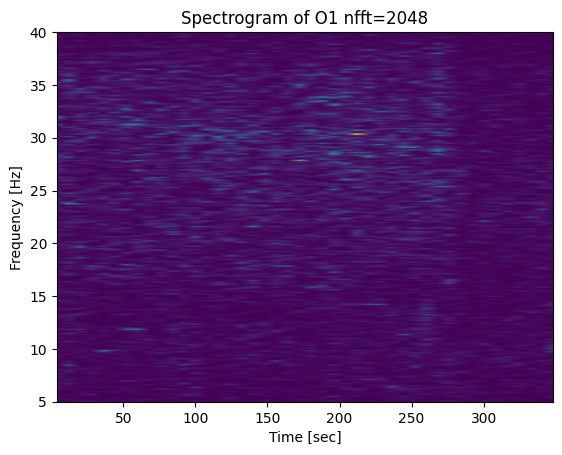

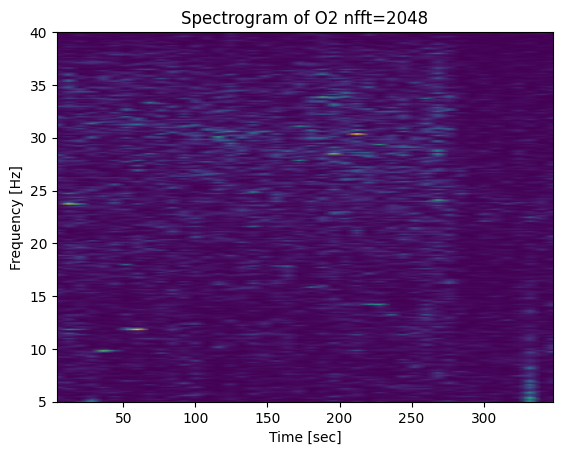

In [64]:
# Plot spectrograms of O1 and O2

from scipy.signal import spectrogram

f, t, Sxx_O1 = spectrogram(O1_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.pcolormesh(t, f, Sxx_O1, shading='gouraud')
plt.title('Spectrogram of O1 nfft=256')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_O2 = spectrogram(O2_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.title('Spectrogram of O2 nfft=256')
plt.pcolormesh(t, f, Sxx_O2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_O1 = spectrogram(O1_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.pcolormesh(t, f, Sxx_O1, shading='gouraud')
plt.title('Spectrogram of O1 nfft=512')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_O2 = spectrogram(O2_eeg, fs=ssvep_data.fsample, nperseg=512, noverlap=0)
plt.title('Spectrogram of O2 nfft=512')
plt.pcolormesh(t, f, Sxx_O2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_O1 = spectrogram(O1_eeg, fs=ssvep_data.fsample, nperseg=2048, noverlap=0)
plt.pcolormesh(t, f, Sxx_O1, shading='gouraud')
plt.title('Spectrogram of O1 nfft=2048')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

f, t, Sxx_O2 = spectrogram(O2_eeg, fs=ssvep_data.fsample, nperseg=2048, noverlap=0, mode='psd')
plt.title('Spectrogram of O2 nfft=2048')
plt.pcolormesh(t, f, Sxx_O2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.show()

In [40]:
# Run the classifier and get the target frequencies
from bci_essentials.classification import SSVEP_riemannian_mdm_classifier

ssvep_data.classifier = SSVEP_riemannian_mdm_classifier(subset=[])

ssvep_data.classifier.set_ssvep_settings(
    n_splits=3, random_seed=42, n_harmonics=3, f_width=0.5
)

ssvep_data.main(
    online=False,
    training=True,
    max_samples=5120,
    pp_type="bandpass",
    pp_low=4,
    pp_high=40,
)

target_freqs = ssvep_data.classifier.target_freqs

# Print the target freqs
print("The target frequencies are:")
print(target_freqs)

initializing the classifier
0
Trial Started
Trial started
['ssvep', '12', '5', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
['ssvep', '12', '5', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
['ssvep', '12', '5', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
['ssvep', '12', '5', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
Trial Ends
Trial ended
adding to training set
4  windows and labels added to training set
Trial Started
Trial started
['ssvep', '12', '11', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
['ssvep', '12', '11', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
['ssvep', '12', '11', '4', '24', '20.57143', '18', '16', '14.4', '12', '10.28571', '9', '8', '7.2', '6', '4.965517']
['ssvep',

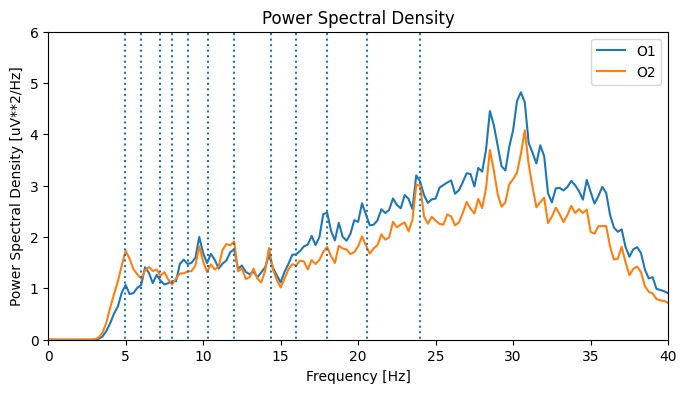

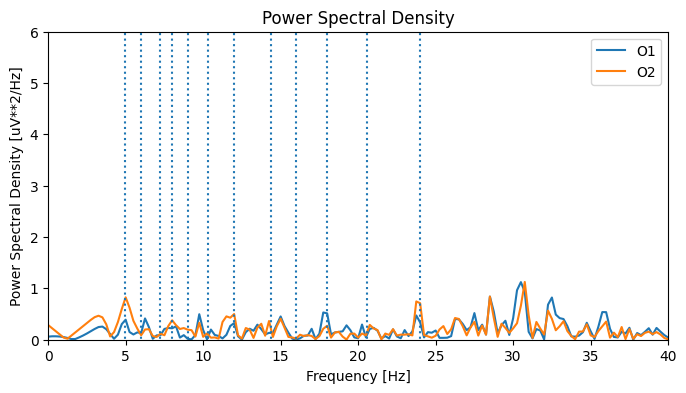

In [47]:
import scipy.signal

# See if this make sense based on our PSD
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(freqs, np.abs(O1_eeg_psd), label='O1')
ax.plot(freqs, np.abs(O2_eeg_psd), label='O2')
for tf in target_freqs:
    ax.vlines(x=tf, ymin=-10, ymax=100, linestyles='dotted')
ax.set_xlim([0, 40])
ax.set_ylim([0, 6])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power Spectral Density [uV**2/Hz]')
ax.set_title('Power Spectral Density')
ax.legend()

# Now plot again, but with detrended data
O1_eeg_psd_detrended = O1_eeg_psd - scipy.signal.savgol_filter(O1_eeg_psd, window_length=51, polyorder=3)
O2_eeg_psd_detrended = O2_eeg_psd - scipy.signal.savgol_filter(O2_eeg_psd, window_length=51, polyorder=3)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(freqs, np.abs(O1_eeg_psd_detrended), label='O1')
ax.plot(freqs, np.abs(O2_eeg_psd_detrended), label='O2')
for tf in target_freqs:
    ax.vlines(x=tf, ymin=-10, ymax=100, linestyles='dotted')
ax.set_xlim([0, 40])
ax.set_ylim([0, 6])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power Spectral Density [uV**2/Hz]')
ax.set_title('Power Spectral Density')
ax.legend()

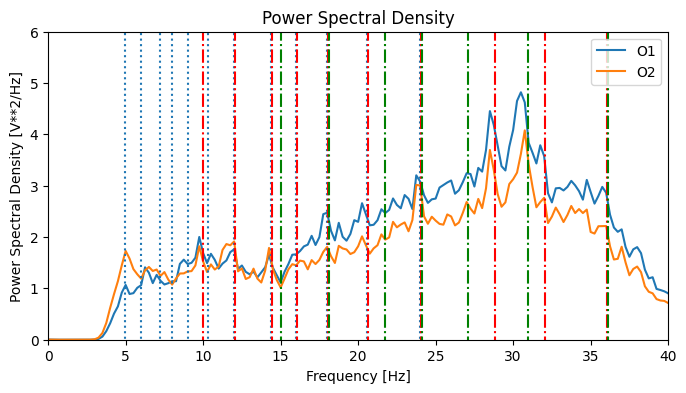

In [59]:
# Plot again but with harmonics in red vertical lines
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(freqs, np.abs(O1_eeg_psd), label='O1')
ax.plot(freqs, np.abs(O2_eeg_psd), label='O2')
for tf in target_freqs:
    ax.vlines(x=tf, ymin=-10, ymax=100, linestyles='dotted')
    # Plot the harmonics, a small amount of offset is added to show lines that would
    # otherwise be on top of each other
    ax.vlines(x=tf*2+0.05, ymin=-10, ymax=100, linestyles='dashdot', colors='r')
    ax.vlines(x=tf*3+0.1, ymin=-10, ymax=100, linestyles='dashed', colors='g')
ax.set_xlim([0, 40])
ax.set_ylim([0, 6])
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power Spectral Density [V**2/Hz]')
ax.set_title('Power Spectral Density')
ax.legend()

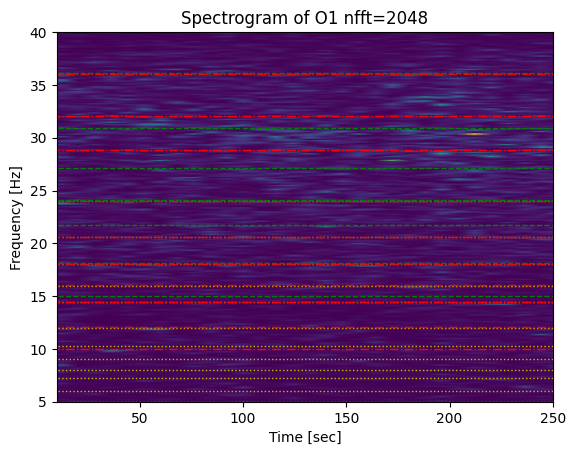

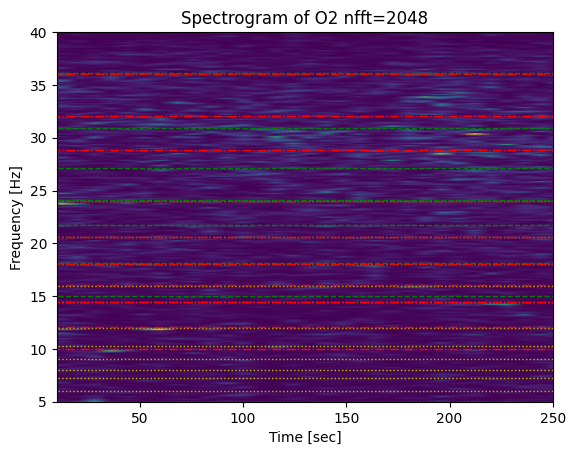

In [62]:
# Plot the spectrogram again, but with the target frequencies highlighted as red lines.

f, t, Sxx_O1 = spectrogram(O1_eeg, fs=ssvep_data.fsample, nperseg=2048, noverlap=0)
plt.pcolormesh(t, f, Sxx_O1, shading='gouraud')
for tf in target_freqs:
    plt.hlines(y=tf, xmin=0, xmax=400, color='y', linewidth=1, linestyle='dotted')
    plt.hlines(y=tf*2+0.05, xmin=0, xmax=400, color='r', linewidth=1, linestyle='dashdot')
    plt.hlines(y=tf*3+0.1, xmin=0, xmax=400, color='g', linewidth=1, linestyle='dashed')
plt.title('Spectrogram of O1 nfft=2048')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.xlim([10,250])
plt.show()

f, t, Sxx_O2 = spectrogram(O2_eeg, fs=ssvep_data.fsample, nperseg=2048, noverlap=0, mode='psd')
for tf in target_freqs:
    plt.hlines(y=tf, xmin=0, xmax=400, color='y', linewidth=1, linestyle='dotted')
    plt.hlines(y=tf*2+0.05, xmin=0, xmax=400, color='r', linewidth=1, linestyle='dashdot')
    plt.hlines(y=tf*3+0.1, xmin=0, xmax=400, color='g', linewidth=1, linestyle='dashed')
plt.title('Spectrogram of O2 nfft=2048')
plt.pcolormesh(t, f, Sxx_O2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([5, 40])
plt.xlim([10,250])
plt.show()

In [67]:
# Plot PSDs of segments according to labels

windows = ssvep_data.classifier.X
labels = ssvep_data.classifier.y

print("debug")

debug
